In [4]:
import numpy as np
import struct

width = 240
height = 180

def load_img(name):
    with open(rf"C:\Users\dmitr\git\srobot\analysis\{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.scatter(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.scatter(x, y1, label=f"{label}{y}")

def gaussian_kernel(size):
   x, y = np.mgrid[-size:size+1, -size:size+1]
   g = np.exp(-(x**2/float(size) + y**2/float(size)))
   return g / g.sum()

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)


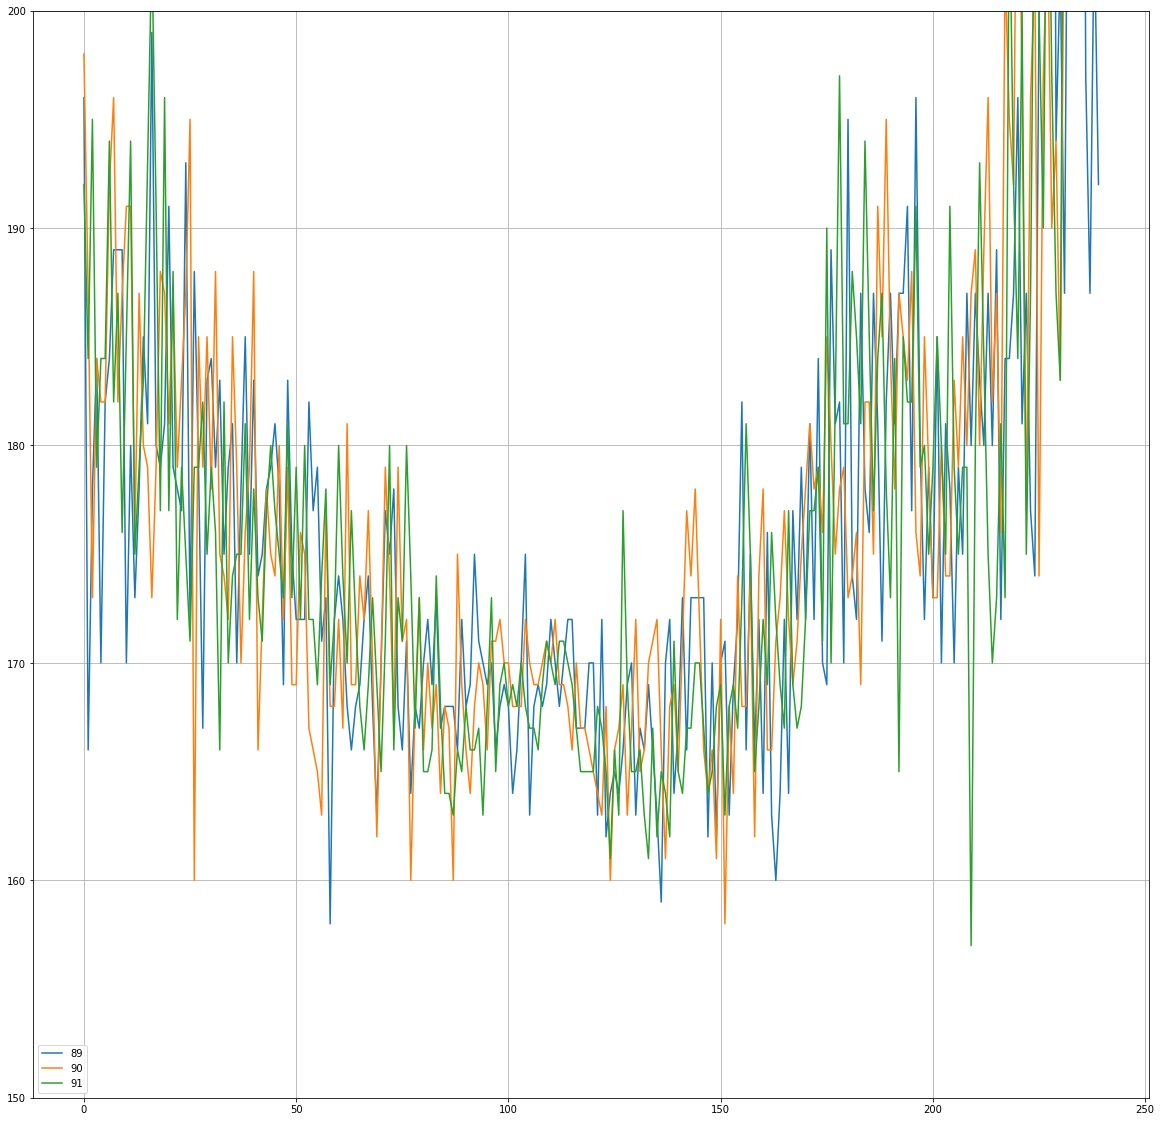

In [150]:
import matplotlib.pyplot as plt

img = load_img("depthwall20")

x = range(width)

plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()


#for y in [10, 90, 170]:
for y in [89,90, 91]:
    y1 = [img[i,y] for i in x]
    ax.plot(x, y1, label=f"{y}")
ax.grid(True)
plt.legend()
ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

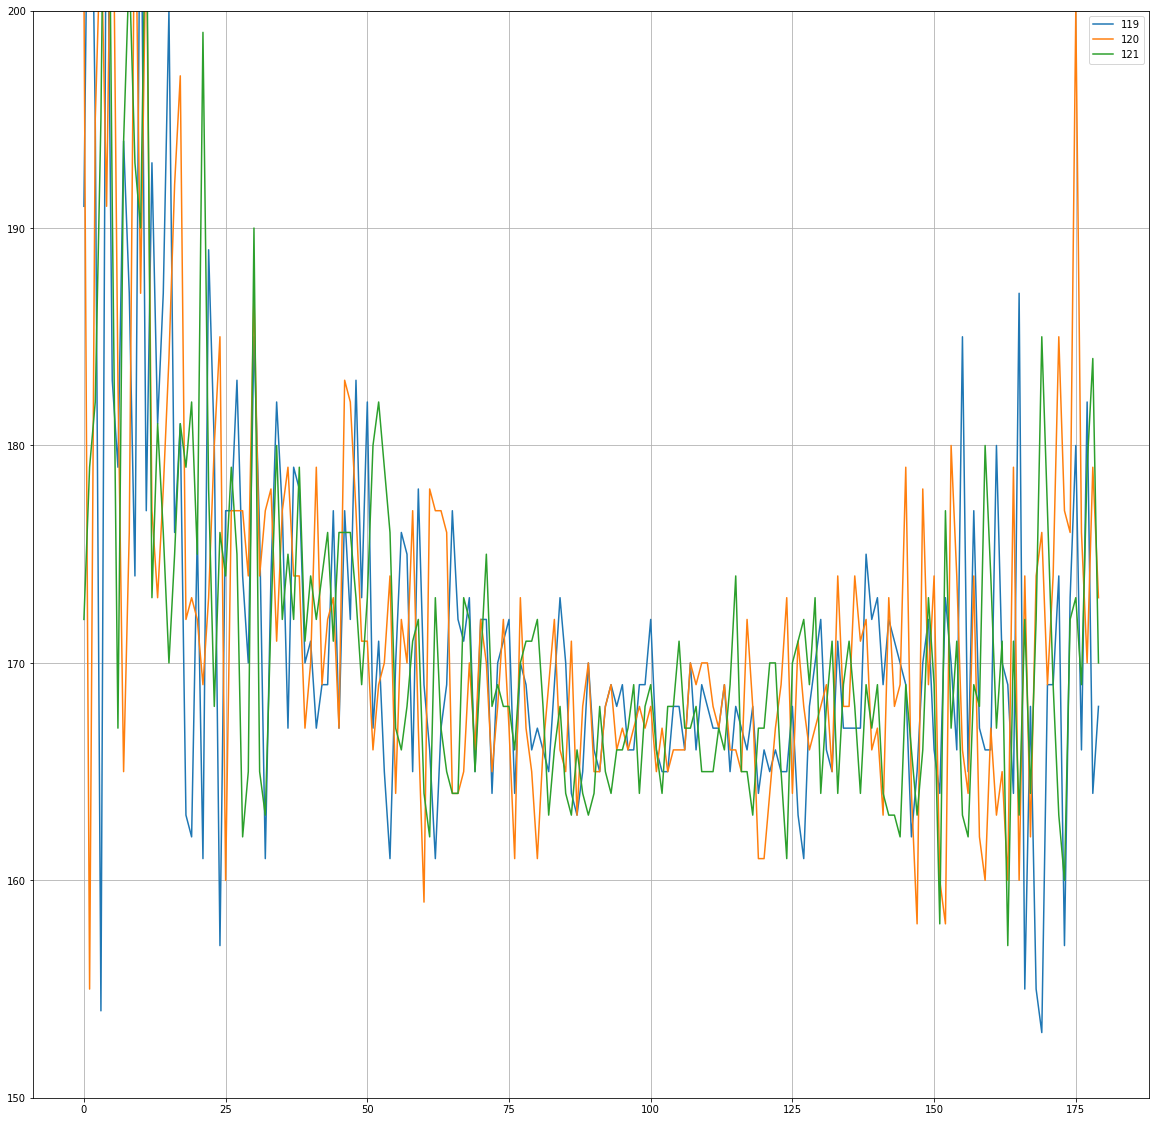

In [27]:
import matplotlib.pyplot as plt

y = range(height)

plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()


#for x in [10, 120, 230]:
for x in [119,120, 121]:
    x1 = [img[x,i] for i in y]
    ax.plot(y, x1, label=f"{x}")
ax.grid(True)
ax.legend()
ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

In [121]:
img_sobj100 = load_img("depth_sobj100")
img_wall150 = load_img("depth_wall150")

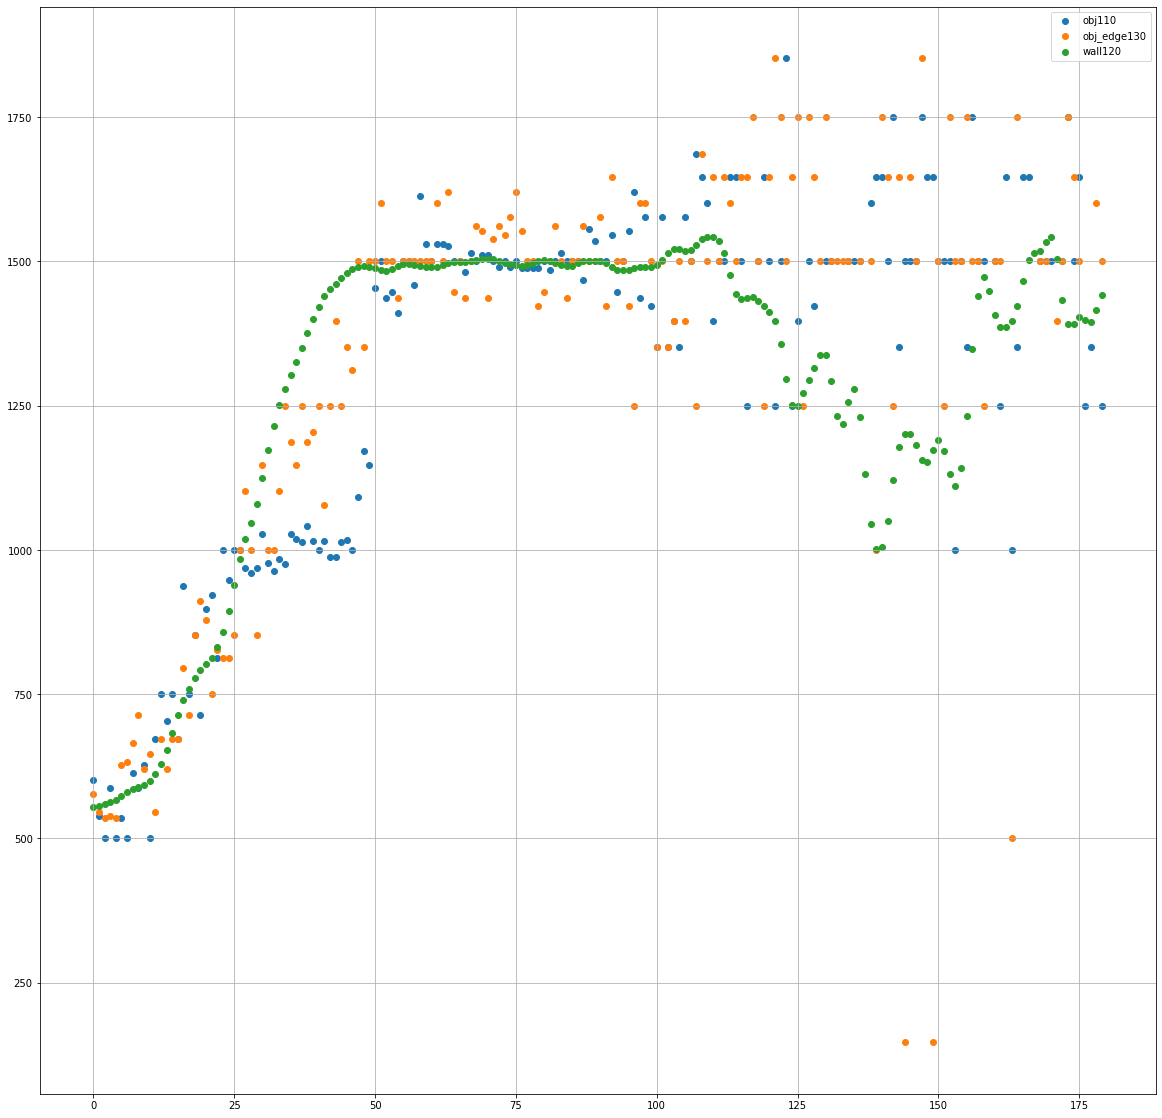

In [151]:
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_yline(ax, img_sobj100, 110, "obj")
draw_yline(ax, img_sobj100, 130, "obj_edge")
#draw_yline(ax, img_sobj100, 160, "obj_out")
draw_yline(ax, img_wall150c, 120, "wall")
#draw_yline(ax, img_wall150, 121, "wall")
ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

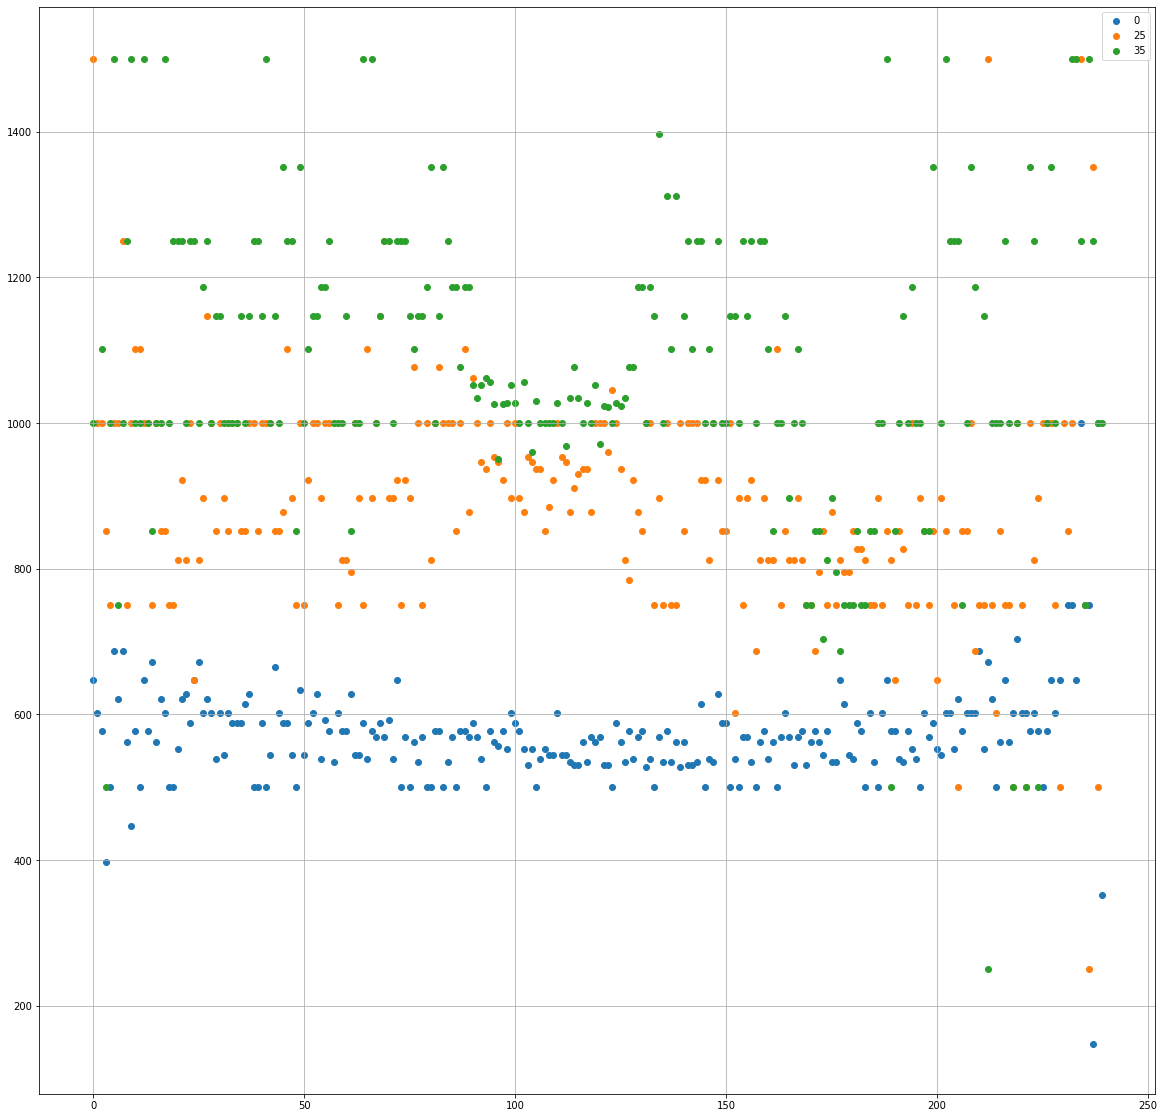

In [152]:
import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_xline(ax, img_sobj100, 0)
draw_xline(ax, img_sobj100, 25)
draw_xline(ax, img_sobj100, 35)
#draw_yline(ax, img_wall150, 121, "wall")
ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

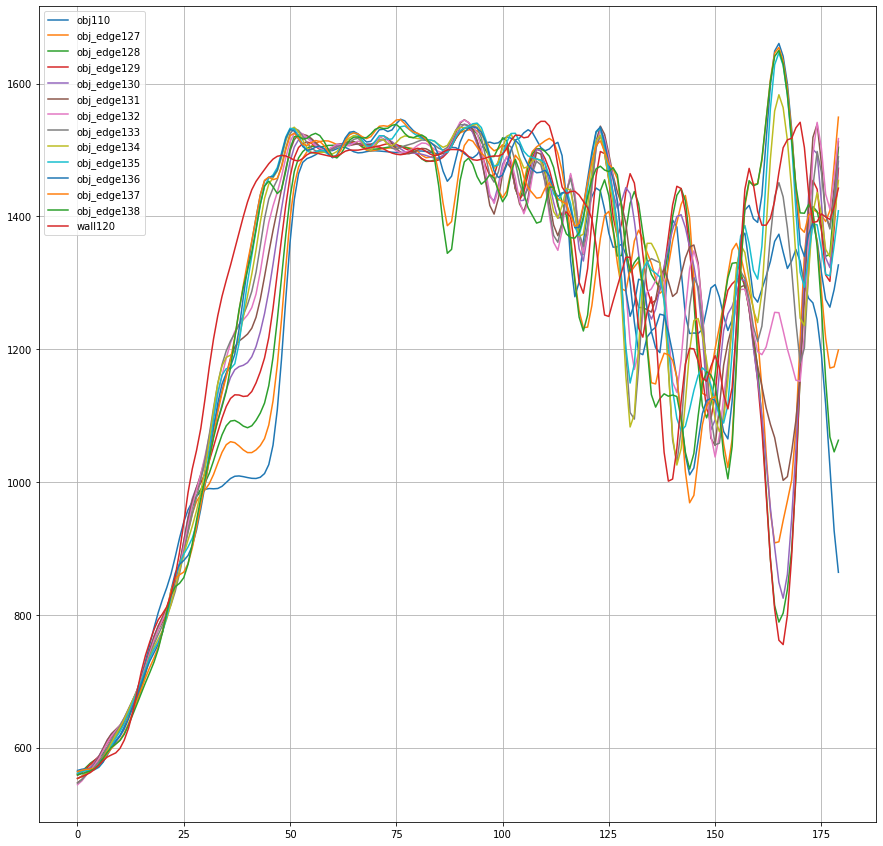

In [189]:
from scipy.ndimage import convolve

kernel_size = 5
c = gaussian_kernel(kernel_size)

img_sobj100c = convolve(img_sobj100, c)
img_wall150c = convolve(img_wall150, c)

import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()
draw_yline(ax, img_sobj100c, 110, "obj")
draw_yline(ax, img_sobj100c, 127, "obj_edge")
draw_yline(ax, img_sobj100c, 128, "obj_edge")
draw_yline(ax, img_sobj100c, 129, "obj_edge")
draw_yline(ax, img_sobj100c, 130, "obj_edge")
draw_yline(ax, img_sobj100c, 131, "obj_edge")
draw_yline(ax, img_sobj100c, 132, "obj_edge")
draw_yline(ax, img_sobj100c, 133, "obj_edge")
draw_yline(ax, img_sobj100c, 134, "obj_edge")
draw_yline(ax, img_sobj100c, 135, "obj_edge")
draw_yline(ax, img_sobj100c, 136, "obj_edge")
draw_yline(ax, img_sobj100c, 137, "obj_edge")
draw_yline(ax, img_sobj100c, 138, "obj_edge")
#draw_yline(ax, img_sobj100, 160, "obj_out")
draw_yline(ax, img_wall150c, 120, "wall")
#draw_yline(ax, img_wall150, 121, "wall")


ax.grid(True)
ax.legend()
#ax.set_ylim(150,200)
#ax.set_xlim(0,80)
    
plt.show()

In [139]:
#image = getImage(img_sobj100c)
image = getImage(load_img("../test1"))
#image = getImage(load_img("depth_sobj100"))
image.show()
#image.save("test.jpeg")

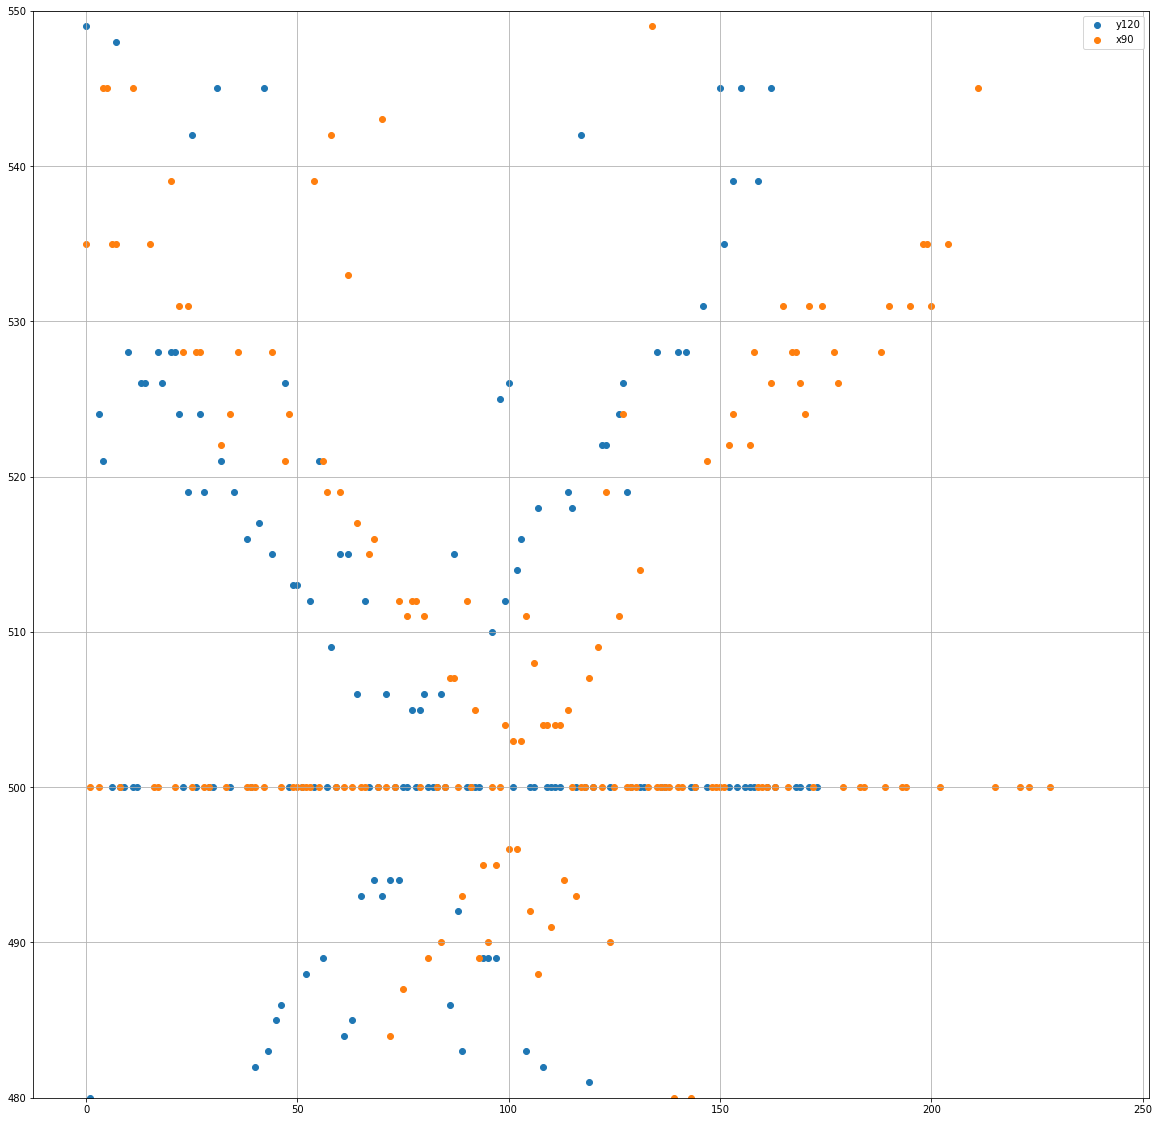

In [153]:
img_wall50 = load_img("depth_wall50")
kernel_size = 10
c = gaussian_kernel(kernel_size)

img_wall50c = convolve(img_wall50, c)

import matplotlib.pyplot as plt
    
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots()
draw_yline(ax, img_wall50, 120, "y")
draw_xline(ax, img_wall50, 90, "x")
ax.grid(True)
ax.legend()
ax.set_ylim(480,550)
#ax.set_xlim(0,80)
    
plt.show()


In [28]:
#shortest
185 / sin(24 * pi / 180)

454.83976708123413

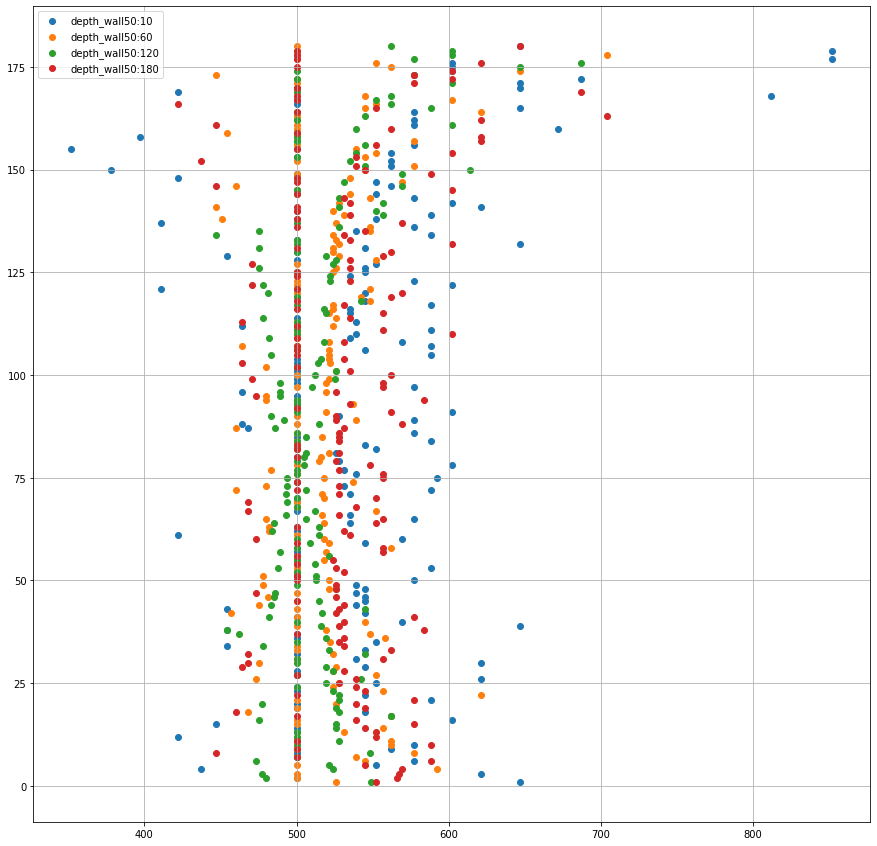

In [142]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_wall50", 10)
dscatter("depth_wall50", 60)
dscatter("depth_wall50", 120)
dscatter("depth_wall50", 180)
#dscatter("depth_wall100", 120)
#dscatter("depth_wall150", 120)
#dscatter("depth_sobj100",110)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

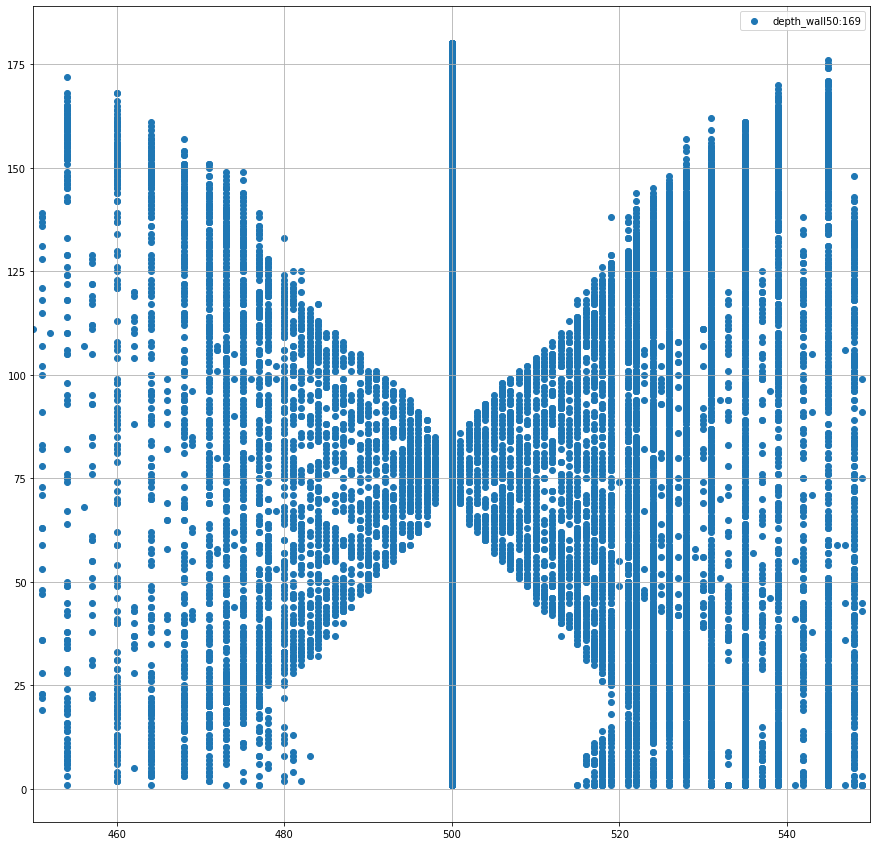

In [194]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        for x0 in range(10,170):
            d = img[x0,y]
            xd.append(d)
            yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_wall50")
#dscatter("depth_wall50")
#dscatter("depth_wall50")
#dscatter("depth_wall50")
#dscatter("depth_wall100")
#dscatter("depth_wall150")
#dscatter("depth_sobj100")

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
ax.set_xlim(450,550)
    
plt.show()

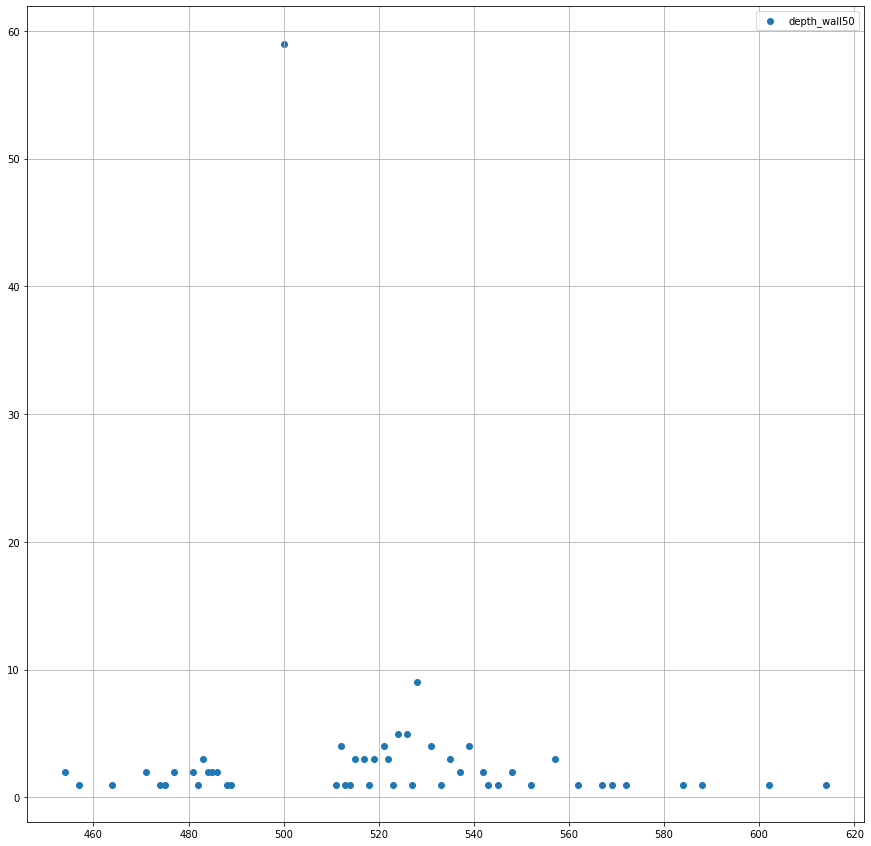

In [147]:
from scipy.ndimage import convolve
from math import *
from collections import defaultdict

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dist(file, y):
    img = load_img(file)
    dist = defaultdict(lambda: 0)
    for x0 in range(10,170):
        d = img[x0,y]
        dist[d] += 1
    x = []
    y = []
    for k,v in dist.items():
        x.append(k)
        y.append(v)
    ax.scatter(x,y, label=f"{file}")

dist("depth_wall50", 75)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

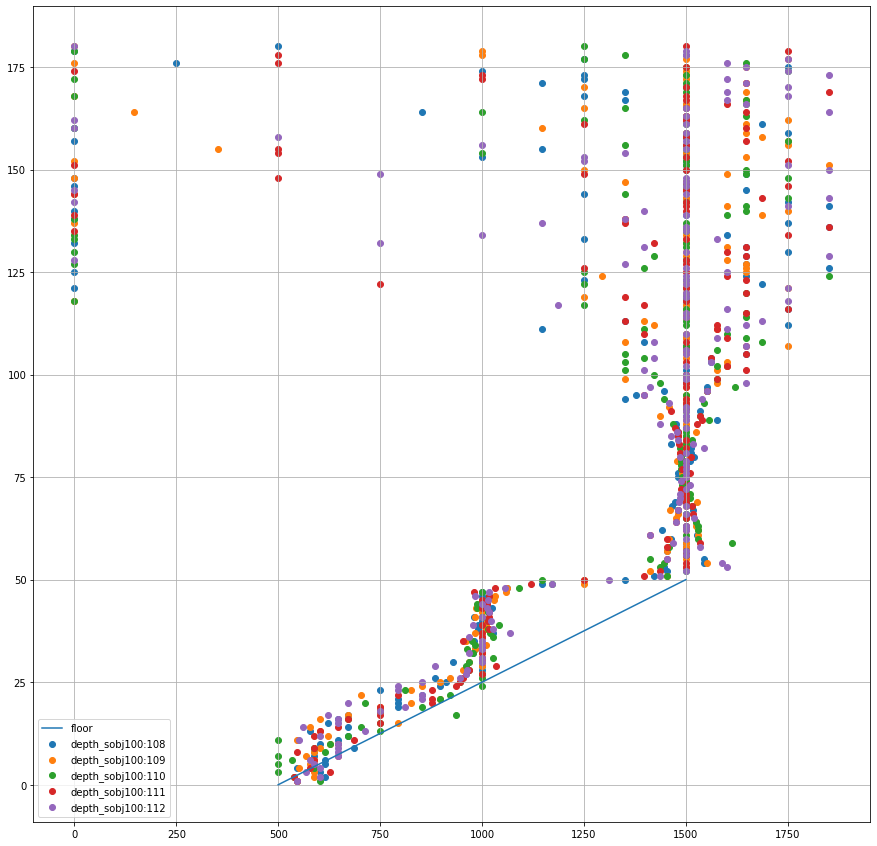

In [190]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        #if d > 900 and d < 1200:
        #    print(d)
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_wall50", 10)
#dscatter("depth_wall50", 60)
#dscatter("depth_wall50", 120)
#dscatter("depth_wall50", 180)
#dscatter("depth_wall100", 120)

#dscatter("depth_wall150", 118)
#dscatter("depth_wall150", 119)
#dscatter("depth_wall150", 120)
#dscatter("depth_wall150", 121)
#dscatter("depth_wall150", 122)

dscatter("depth_sobj100",108)
dscatter("depth_sobj100",109)
dscatter("depth_sobj100",110)
dscatter("depth_sobj100",111)
dscatter("depth_sobj100",112)

ax.plot([500,1500],[0,50],label="floor")
ax.grid(True)
ax.legend()
#ax.set_ylim(0,80)
#ax.set_xlim(500,1500)
    
plt.show()

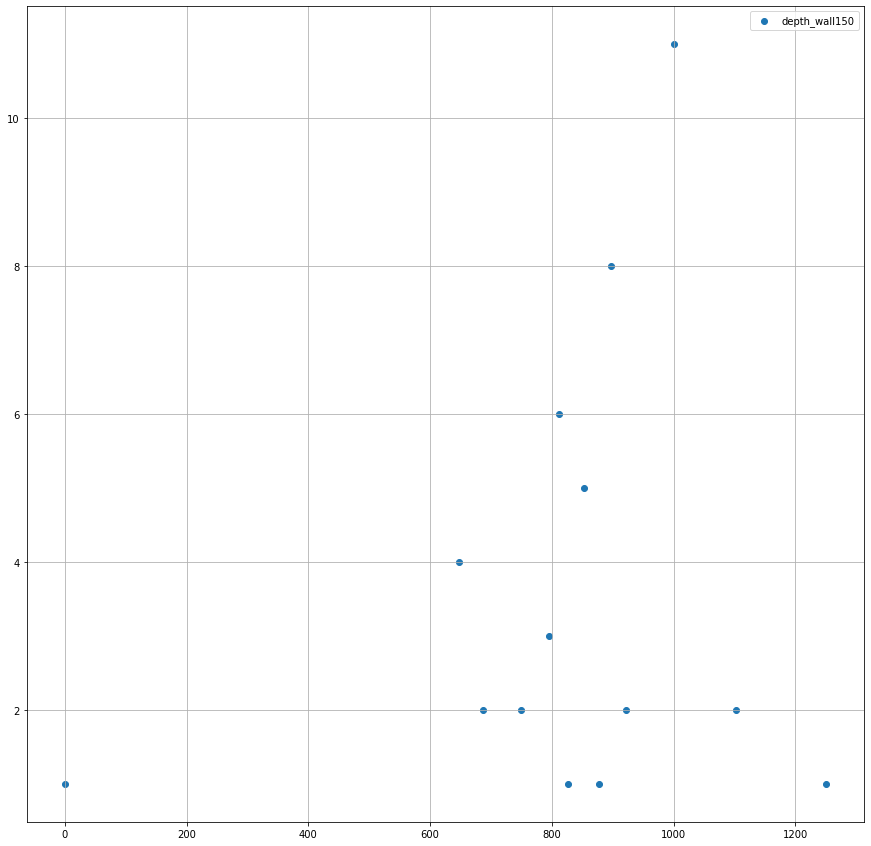

In [173]:
from scipy.ndimage import convolve
from math import *
from collections import defaultdict

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

img = load_img("depth_wall150")

x0 = 120
#y0 = 75
y0 = 24

c = 3

dist = defaultdict(lambda: 0)
for x in range(x0 - c, x0 + c + 1):
    for y in range(y0 - c, y0 + c + 1):
        dist[img[x,height - y]] += 1
x = []
y = []
for k,v in dist.items():
    x.append(k)
    y.append(v)
ax.scatter(x,y, label=f"{file}")

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

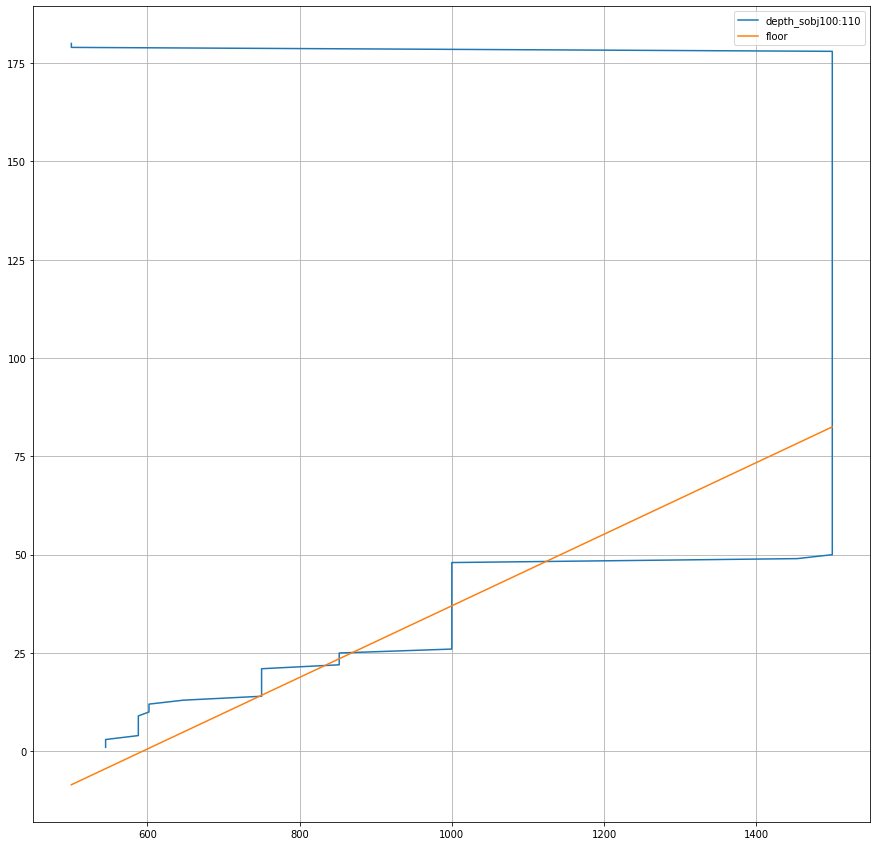

In [13]:
from scipy.ndimage import convolve
from math import *
from collections import defaultdict

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def cfilter(img, x0, y0, c):
    x1 = x0 - c
    if x1 < 0:
        x1 = 0
    x2 = x0 + c + 1
    if x2 > width:
        x2 = width
    y1 = y0 - c
    if y1 < 0:
        y1 = 0
    y2 = y0 + c + 1
    if y2 >= height:
        y2 = height
        
    dist = defaultdict(lambda: 0)
    for x in range(x1,x2):
        for y in range(y1,y2):
            v = img[x,y]
            if v != 0:
                dist[v] += 1
    maxk = None
    maxv = 0
    cnt = 0
    for k, v in dist.items():
        if v > maxv:
            maxk = k
            maxv = v
            cnt = 1
        else:
            if v == maxv:
                cnt += 1
    return maxk
    
    
c = 3

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = cfilter(img,x0,y,c)
        xd.append(d)
        yd.append(height - y)

    ax.plot(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_wall50", 10)
#dscatter("depth_wall50", 60)
#dscatter("depth_wall50", 120)
#dscatter("depth_wall50", 180)
#dscatter("depth_wall100", 120)
#dscatter("depth_wall150", 120)
dscatter("depth_sobj100",110)

ax.plot([500,1500],[-8.5,37 + (37 + 8.5)],label="floor")
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

In [3]:
m = [(50,   70, 35),
     (50,  100, 48),
     (50,  155, 79),
     (50,  230, 105),
     (100,  70, 17),
     (100, 100, 24),
     (100, 155, 36),
     (100, 230, 52)]
for d, w, p in m:
    print(d, w/p, w / p / d)

50 2.0 0.04
50 2.0833333333333335 0.04166666666666667
50 1.9620253164556962 0.039240506329113925
50 2.1904761904761907 0.04380952380952381
100 4.117647058823529 0.04117647058823529
100 4.166666666666667 0.04166666666666667
100 4.305555555555555 0.043055555555555555
100 4.423076923076923 0.04423076923076923


In [10]:
print(100, height - (125 + (70 / 4.1)))
print(100, height - (119 + (100 / 4.2)))
print(100, height - (92 + (230 / 4.4)))
print(50, height - (111 + (155 / 2)))


100 37.92682926829269
100 37.190476190476204
100 35.72727272727275
50 -8.5
